In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [39]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization
from keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

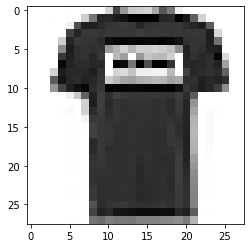

In [4]:
plt.imshow(x_train[1],cmap='gray_r')

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0

In [6]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [7]:
# one hot encode target values
trainY = to_categorical(y_train)
testY = to_categorical(y_test)

In [40]:
model=Sequential()
model.add(Conv2D(50,padding="same",kernel_size=(5,5),strides=1,input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(20,padding='same',kernel_size=(5,5),strides=1,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(30,padding='same',kernel_size=(5,5),strides=1,activation="relu"))
model.add(Conv2D(40,padding='same',kernel_size=(5,5),strides=1,activation="relu"))
model.add(Conv2D(10,padding='same',kernel_size=(5,5),strides=1,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.20))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [35]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [36]:
history=model.fit(x_train,trainY,validation_data=(x_test,testY),epochs=20,batch_size=50)

Epoch 1/20
1200/1200 [==============================] - 8s 6ms/step - loss: 0.7718 - accuracy: 0.7049 - val_loss: 0.4491 - val_accuracy: 0.8372
Epoch 2/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.4658 - accuracy: 0.8304 - val_loss: 0.4051 - val_accuracy: 0.8520
Epoch 3/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.3838 - accuracy: 0.8602 - val_loss: 0.3845 - val_accuracy: 0.8531
Epoch 4/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.3406 - accuracy: 0.8777 - val_loss: 0.3043 - val_accuracy: 0.8947
Epoch 5/20
1200/1200 [==============================] - 8s 6ms/step - loss: 0.3068 - accuracy: 0.8905 - val_loss: 0.2890 - val_accuracy: 0.8993
Epoch 6/20
1200/1200 [==============================] - 8s 7ms/step - loss: 0.2864 - accuracy: 0.8971 - val_loss: 0.2737 - val_accuracy: 0.9036
Epoch 7/20
1200/1200 [==============================] - 8s 6ms/step - loss: 0.2654 - accuracy: 0.9067 - val_loss: 0.2642 - val_accuracy:

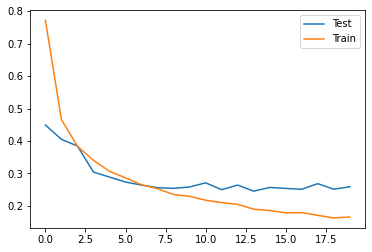

In [37]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.legend(("Test","Train"))

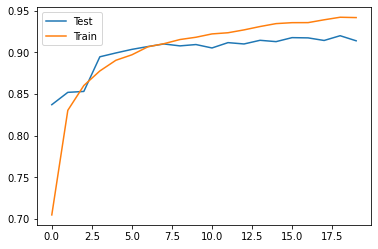

In [38]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.legend(("Test","Train"))